In [91]:
from wrangle_zillow import all_2017_zillow_data, handle_missing_values, get_single_units
from prepare import prep_zillow_data
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [71]:
df = all_2017_zillow_data()

In [72]:
fips_dummies = pd.get_dummies(df['fips'], drop_first=False)
fips_dummies = fips_dummies.rename(columns={fips_dummies.columns[0] : 'fips_6037', fips_dummies.columns[1] : 'fips_6059', fips_dummies.columns[2] : 'fips_6111'})
fips_dummies.head()

,fips_6037,fips_6059,fips_6111
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0


In [73]:
df = pd.concat([df, fips_dummies], axis=1)

In [74]:
train, validate, test = prep_zillow_data(df)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [75]:
train.shape, validate.shape, test.shape

((29288, 31), (12552, 31), (10460, 31))

In [76]:
train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,fips_6037,fips_6059,fips_6111
8118,2.0,4.0,6.0,1250.0,1250.0,6059.0,2.0,33701900.0,-118015670.0,5490.0,...,114005.0,2437.84,6.059099e+13,0.102798,2017-02-06,None,Single Family Residential,0,1,0
28330,1.0,3.0,4.0,792.0,792.0,6037.0,1.0,34103120.0,-118244724.0,4498.0,...,326799.0,5026.06,6.037187e+13,0.053515,2017-04-20,Floor/Wall,Single Family Residential,1,0,0
30490,2.0,3.0,6.0,1315.0,1315.0,6037.0,2.0,34255776.0,-118481450.0,7685.0,...,248611.0,5005.70,6.037110e+13,-0.019364,2017-04-27,Floor/Wall,Single Family Residential,1,0,0
46553,2.5,3.0,6.0,1492.0,1492.0,6059.0,2.0,33597195.0,-117746409.0,3600.0,...,219012.0,3550.40,6.059063e+13,-0.048392,2017-06-15,None,Single Family Residential,0,1,0
76482,2.0,4.0,4.0,1112.0,1112.0,6037.0,2.0,34683316.0,-118144976.0,6127.0,...,13417.0,1575.38,6.037901e+13,0.057565,2017-09-14,Floor/Wall,Single Family Residential,1,0,0


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29288 entries, 8118 to 63603
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   29288 non-null  float64
 1   bedroomcnt                    29288 non-null  float64
 2   buildingqualitytypeid         29288 non-null  float64
 3   calculatedfinishedsquarefeet  29288 non-null  float64
 4   finishedsquarefeet12          29288 non-null  float64
 5   fips                          29288 non-null  float64
 6   fullbathcnt                   29288 non-null  float64
 7   latitude                      29288 non-null  float64
 8   longitude                     29288 non-null  float64
 9   lotsizesquarefeet             29288 non-null  float64
 10  propertycountylandusecode     29288 non-null  object 
 11  rawcensustractandblock        29288 non-null  float64
 12  regionidcity                  29288 non-null  float64
 13

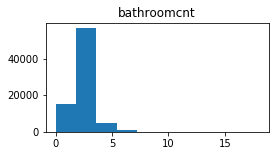

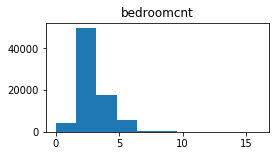

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


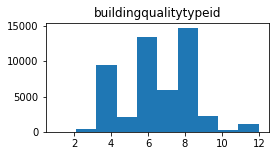

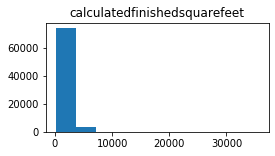

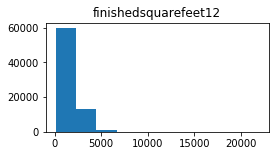

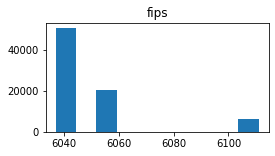

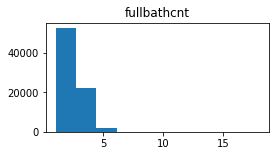

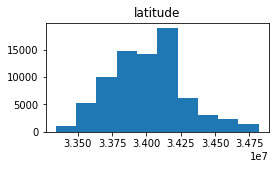

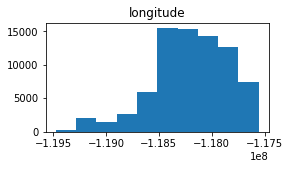

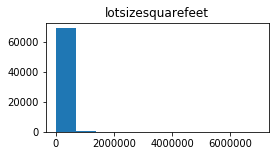

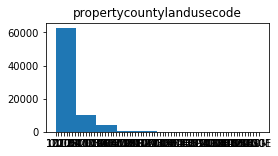

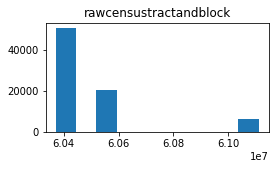

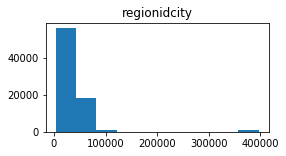

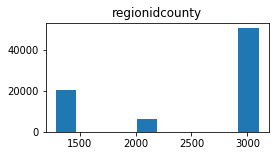

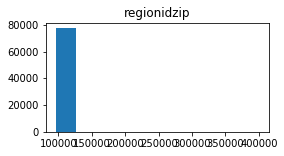

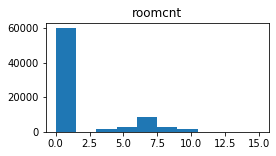

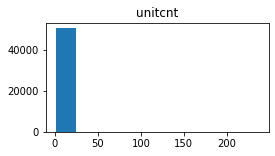

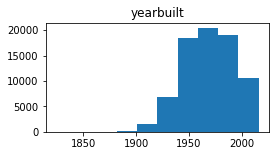

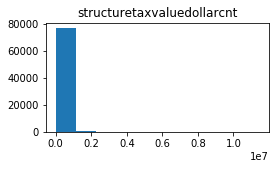

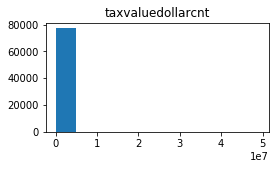

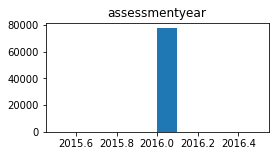

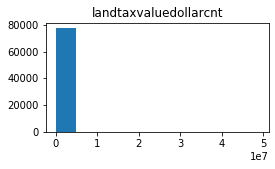

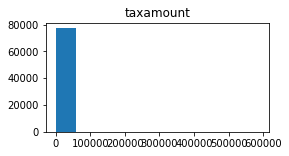

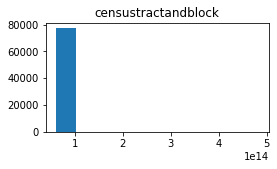

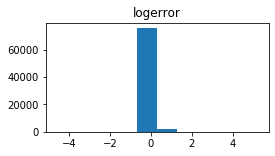

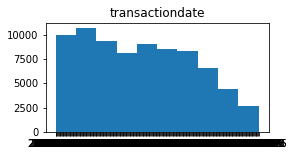

TypeError: '<=' not supported between instances of 'NoneType' and 'NoneType'

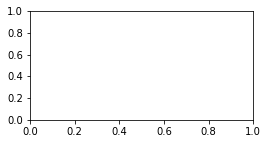

In [7]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Does the log error increase as square footage increases?  
Does the log error improve on newer houses?  
Does higher number of bedrooms increase log error?  
Does the county the house is in have an effect on log error?  
Does the type of property have an effect on the log error?

### Answer those questions through a mix of statistical tests and visualizations.

In your exploration, be sure you include the following:

a plot with at least 3 dimensions, such as x, y, and color.

at least 3 different types of plots (like box, scatter, bar, ...)

at least 2 statistical tests.

document takeaways/conclusions after each question is addressed.

$H_0$: Log error is independent on total square footage.  
$H_a$: Log error is dependent on square footage.

In [20]:
# Alpha: 0.05 for all hypothesis tests.
x = train.calculatedfinishedsquarefeet
y = train.logerror

corr, p = stats.pearsonr(x, y)
corr, p

(0.03430885804842705, 4.2796280188057285e-09)

Because our p value is lower than our alpha of .05 we can reject the null hypothesis which means that log error is dependent on our square footage.

$H_0$: Log error is independent on which county the house is in.  
$H_a$: Log error is dependent on which county the house is in.

In [79]:
train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,fips_6037,fips_6059,fips_6111
8118,2.0,4.0,6.0,1250.0,1250.0,6059.0,2.0,33701900.0,-118015670.0,5490.0,...,114005.0,2437.84,6.059099e+13,0.102798,2017-02-06,None,Single Family Residential,0,1,0
28330,1.0,3.0,4.0,792.0,792.0,6037.0,1.0,34103120.0,-118244724.0,4498.0,...,326799.0,5026.06,6.037187e+13,0.053515,2017-04-20,Floor/Wall,Single Family Residential,1,0,0
30490,2.0,3.0,6.0,1315.0,1315.0,6037.0,2.0,34255776.0,-118481450.0,7685.0,...,248611.0,5005.70,6.037110e+13,-0.019364,2017-04-27,Floor/Wall,Single Family Residential,1,0,0
46553,2.5,3.0,6.0,1492.0,1492.0,6059.0,2.0,33597195.0,-117746409.0,3600.0,...,219012.0,3550.40,6.059063e+13,-0.048392,2017-06-15,None,Single Family Residential,0,1,0
76482,2.0,4.0,4.0,1112.0,1112.0,6037.0,2.0,34683316.0,-118144976.0,6127.0,...,13417.0,1575.38,6.037901e+13,0.057565,2017-09-14,Floor/Wall,Single Family Residential,1,0,0


In [80]:
x1 = train.fips_6037
x2 = train.fips_6059
x3 = train.fips_6111

print(stats.ttest_ind(x1, y))
print(stats.ttest_ind(x2, y))
print(stats.ttest_ind(x3, y))

Ttest_indResult(statistic=209.51504009034667, pvalue=0.0)
Ttest_indResult(statistic=90.3490281195682, pvalue=0.0)
Ttest_indResult(statistic=34.387697013480704, pvalue=1.4045451560048893e-256)


For all three of our county codes our p value is lower than our alpha of .05 so log error is dependent on which county the property is in. Our strongest correlation seems to be fips 6037 which has the highest t-score with a very very low p value that was rounded to 0.

$H_0$: Log error is independent on when the house was built.  
$H_a$: Log error decreases on newer houses.

In [92]:
conditions = [(train.yearbuilt < 1990), (train.yearbuilt >= 1990)]
values = [0, 1]

train['built_after_1990'] = np.select(conditions, values)
train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,fips_6037,fips_6059,fips_6111,built_after_1990
8118,2.0,4.0,6.0,1250.0,1250.0,6059.0,2.0,33701900.0,-118015670.0,5490.0,...,2437.84,6.059099e+13,0.102798,2017-02-06,None,Single Family Residential,0,1,0,0
28330,1.0,3.0,4.0,792.0,792.0,6037.0,1.0,34103120.0,-118244724.0,4498.0,...,5026.06,6.037187e+13,0.053515,2017-04-20,Floor/Wall,Single Family Residential,1,0,0,0
30490,2.0,3.0,6.0,1315.0,1315.0,6037.0,2.0,34255776.0,-118481450.0,7685.0,...,5005.70,6.037110e+13,-0.019364,2017-04-27,Floor/Wall,Single Family Residential,1,0,0,0
46553,2.5,3.0,6.0,1492.0,1492.0,6059.0,2.0,33597195.0,-117746409.0,3600.0,...,3550.40,6.059063e+13,-0.048392,2017-06-15,None,Single Family Residential,0,1,0,0
76482,2.0,4.0,4.0,1112.0,1112.0,6037.0,2.0,34683316.0,-118144976.0,6127.0,...,1575.38,6.037901e+13,0.057565,2017-09-14,Floor/Wall,Single Family Residential,1,0,0,0


In [94]:
x = train.built_after_1990

print(stats.ttest_ind(x, y))

Ttest_indResult(statistic=58.28740747931061, pvalue=0.0)


The p value is lower than our alpha and so log error seems to decrease on houses built after 1990.